# Imports

In [1]:
from IPython.display import Audio
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np, tensorflow as tf, pandas as pd

In [2]:
!pip install pretty_midi librosa numpy matplotlib
!pip install mirdata
!sudo apt update
!sudo apt install fluidsynth fluid-soundfont-gm
# Установите FluidSynth:
# Для Ubuntu/Debian: sudo apt-get install fluidsynth
# Для macOS: brew install fluid-synth
# Для Windows: скачайте с https://www.fluidsynth.org/

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 43.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 3.0 MB/s eta 0:00:00
  Created wheel for pretty_midi: filename=pretty_midi-0.2.11-py3-none-any.whl size=5595886 sha256=a086be5ff5e59b204174bf8d9a2f692a98ffe4bed31d9e46da523f05988dedb6
  Stored in directory: /root/.cache/pip/wheels/f4/ad/93/a7042fe12668827574927ade9deec7f29aad2a1001b1501882
Successfully built pretty_midi
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.6/47.6 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.8/263.8 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.4/494.4 kB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.0/214.0 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 429.0/429.0 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━

# Librosa

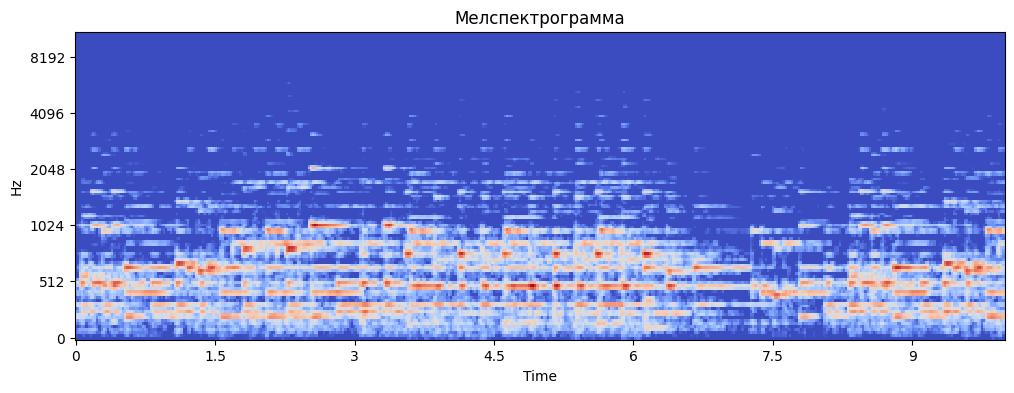

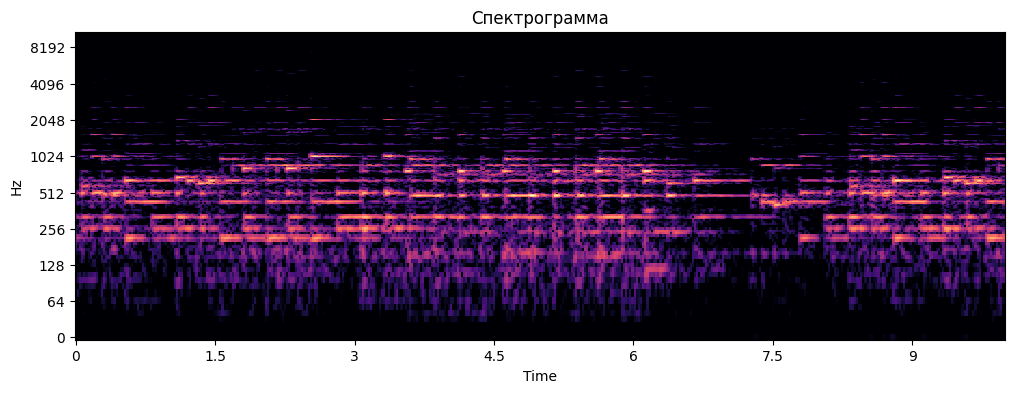

In [4]:
# file_name = 'LinkinPark_Numb'
# file_name = 'Сестры Шмелевы - Ах, Таня, Танечка (из фильма «Карнавальная ночь»)'
# file_name = 'Mihail_Pletnyov_SHopen_Vals_3_lya_minor_dlya_fortepiano_Op_34_2'
# file_name = 'Glee Cast - Le Jazz Hot (minus) +0 semitone'
# file_name = 'CHajkovskij_Pyotr_Ilich_-_CSHelkunchik_(SkySound.cc)'
file_name = 'turkish-march-mozart-rondo-alla-turca'
dir = '/content'
path = f'{dir}/{file_name}.mp3'

offset, duration = 3, 10
y, sr = librosa.load(path, offset=offset, duration=duration)

melspec = librosa.amplitude_to_db(librosa.feature.melspectrogram(y=y, sr=sr))
plt.figure(figsize=(12, 4))
librosa.display.specshow(melspec, sr=sr, x_axis='time', y_axis='mel')
plt.title('Мелспектрограмма')
plt.show()

plt.figure(figsize=(12, 4))
S = np.abs(librosa.stft(y))
S = S ** 2
D = librosa.amplitude_to_db(S, ref=np.max)
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
plt.title('Cпектрограмма')
plt.show()

hop_length = 128
tempo, beats = librosa.beat.beat_track(y=y, sr=sr, units='time', hop_length=hop_length)
# tempo = librosa.feature.tempo(y=y, sr=sr, hop_length=hop_length)
oenv = librosa.onset.onset_strength(y=y, sr=sr, max_size=1, detrend=True, aggregate=np.median, hop_length=hop_length)
oenv = np.abs(oenv)
# oenv *= sr / 2 / oenv.max()
tempogram = librosa.feature.tempogram(y=y, sr=sr) # hop_length=512
# tempogram[0] = 0
# tempogram += np.tile(np.arange(tempogram.shape[0]) / 1.1 / tempogram.shape[0], (tempogram.shape[1], 1)).T
peak_times = librosa.onset.onset_detect(onset_envelope=oenv, units='time', hop_length=hop_length)
times = librosa.times_like(oenv, sr=sr, hop_length=hop_length)
# frequencies = librosa.tempo_frequencies(tempogram.shape[0])
# tempo_freqs = frequencies[tempogram.argmax(axis=0)]
dur_sec = 5
step_sec = 0.5
dur_samples = int(dur_sec * sr)
step_samples = int(step_sec * sr)
rng = np.arange(0, y.shape[0] - dur_samples, step_samples)
tempo_freqs = [librosa.feature.tempo(y=y[i : i + dur_samples], sr=sr, hop_length=hop_length) for i in rng]

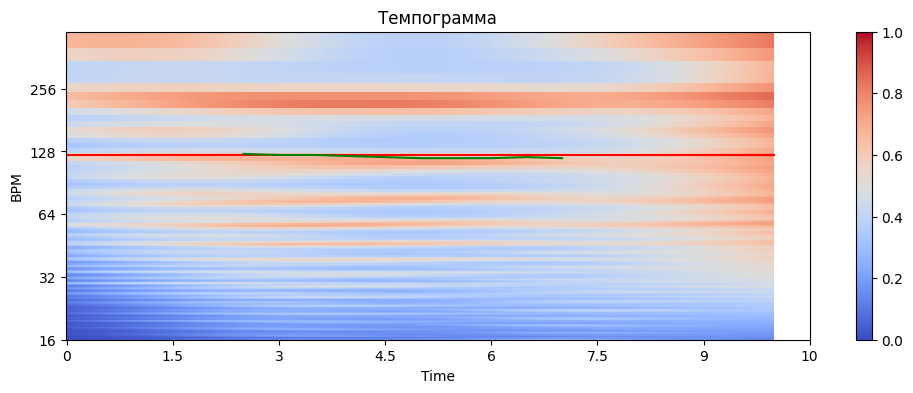

[123.046875]


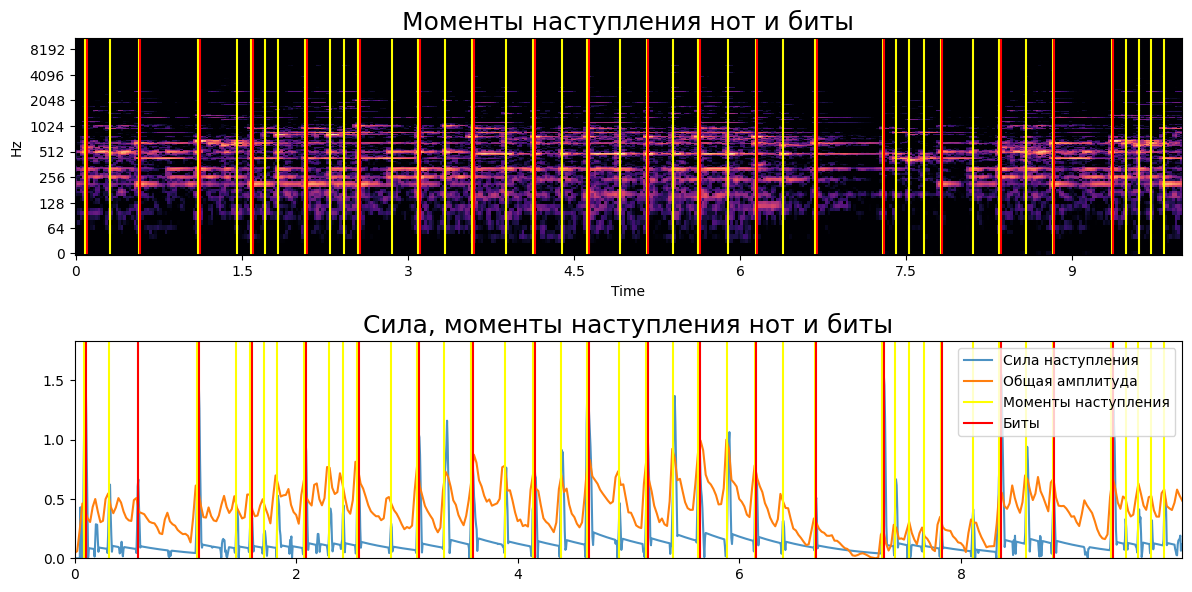

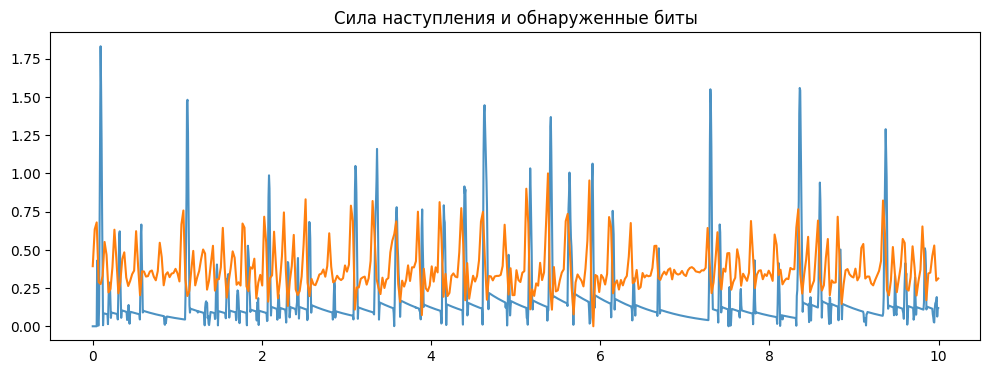

In [19]:
plt.figure(figsize=(12, 4))
librosa.display.specshow(tempogram, sr=sr, x_axis='time', y_axis='tempo')
plt.plot([0, duration], [tempo, tempo], c='r')
plt.title('Темпограмма')
plt.plot(rng / sr + dur_sec / 2, tempo_freqs, c='g')
plt.colorbar()
plt.show()

print(tempo)

fig, ax = plt.subplots(2, 1, figsize=(12, 6))
# ax[0].figure(figsize=(12, 3))
img = librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log', ax=ax[0])
for b in peak_times:
    ax[0].plot([b, b], [0, sr / 2], c='yellow')
for b in beats:
    ax[0].plot([b, b], [0, sr / 2], c='red')
ax[0].set_title('Моменты наступления нот и биты', size=18)
# plt.show()

# Сила наступления с битами
# plt.figure(figsize=(12, 3))
# librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
ax[1].plot(times, oenv, label='Сила наступления', alpha=0.8)
d_sum = D.sum(axis=0)
d_sum -= d_sum.min()
d_sum /= d_sum.max()
ax[1].plot(np.linspace(0, times[-1], d_sum.shape[0]), d_sum / d_sum.max(),
         label='Общая амплитуда')
for b in peak_times:
    if b == peak_times[0]:
        ax[1].plot([b, b], [0, oenv.max()], c='yellow',
                 label='Моменты наступления')
    else:
        ax[1].plot([b, b], [0, oenv.max()], c='yellow')
for b in beats:
    if b == beats[0]:
        ax[1].plot([b, b], [0, oenv.max()], c='red',
                 label='Биты')
    else:
        ax[1].plot([b, b], [0, oenv.max()], c='red')
ax[1].set_title('Сила, моменты наступления нот и биты', size=18)
plt.margins(0)
plt.tight_layout(pad=1)
ax[1].legend(loc='upper right')
plt.show()

# Сила наступления с битами
plt.figure(figsize=(12, 4))
# librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
plt.plot(times, oenv, label='Сила наступления', alpha=0.8)
d_sum = D.sum(axis=0)
d_sum = d_sum[1:] - d_sum[:-1]
d_sum -= d_sum.min()
d_sum /= d_sum.max()
plt.plot(np.linspace(0, times[-1], d_sum.shape[0]), d_sum / d_sum.max())
# for b in peak_times:
#     plt.plot([b, b], [0, oenv.max()], c='yellow')
plt.title('Сила наступления и обнаруженные биты')
# plt.legend()
plt.show()

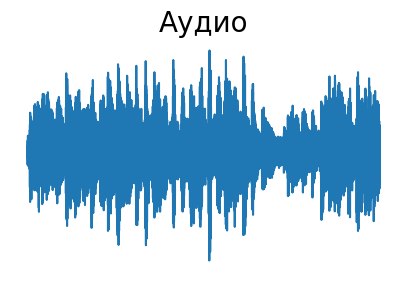

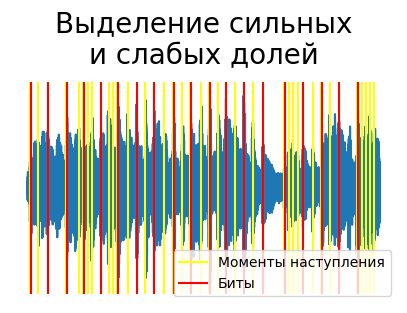

In [63]:
# fig, axes = plt.subplots(1, 2, figsize=(10, 3))
plt.figure(figsize=(5, 3))
axes = [plt, plt]
axes[0].plot(librosa.samples_to_time(np.arange(y.shape[0])), y)
axes[0].title('Аудио', size=20)
plt.axis('off')
plt.show()
plt.figure(figsize=(5, 3))
axes[1].plot(librosa.samples_to_time(np.arange(y.shape[0])), y)
y_max = np.abs(y).max()
for b in peak_times:
    if b == peak_times[0]:
        axes[1].plot([b, b], [-y_max, y_max], c='yellow',
                 label='Моменты наступления')
    else:
        axes[1].plot([b, b], [-y_max, y_max], c='yellow')
for b in beats:
    if b == beats[0]:
        axes[1].plot([b, b], [-y_max, y_max], c='red',
                 label='Биты')
    else:
        axes[1].plot([b, b], [-y_max, y_max], c='red')

# for ax in axes.ravel():
#     ax.set_axis_off()
plt.axis('off')
axes[1].title('Выделение сильных\nи слабых долей', size=20)
axes[1].legend()
plt.show()

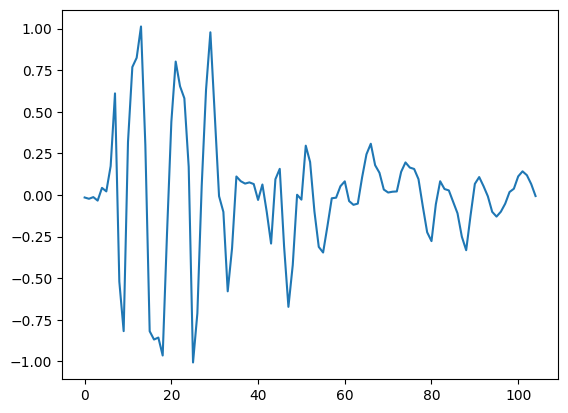

In [51]:
audio, sr = librosa.load(path, offset=offset, duration=duration)
click_sound, _ = librosa.load(f'{dir}/mixkit-on-or-off-light-switch-tap-2585.wav', sr=sr)
click_sound = click_sound[20:125]
plt.plot(click_sound)
coeff = 4
click_sound *= (audio.max() - audio.min()) / coeff / (click_sound.max() - click_sound.min())
n = click_sound.shape[0]
# shift = n//2
shift = 20
for b in librosa.time_to_samples(beats):
    x1 = max(b+shift-n, 0)
    x2 = min(b+shift, audio.shape[0])
    audio[x1:x2] += click_sound[:x2-x1]
for b in librosa.time_to_samples(peak_times):
    x1 = max(b+shift-n, 0)
    x2 = min(b+shift, audio.shape[0])
    audio[x1:x2] += click_sound[:x2-x1] * 5
Audio(audio, rate=sr)